Defaulting to user installation because normal site-packages is not writeable
(858, 14)
Categorical attributes: 4
Integer attributes: 0
Float attributes: 2
Categorical attributes:
['Soil texture', 'Soi drainage class', 'Past erosion', 'Class of Land Unit']
No. of. categorical features:  4
[LightGBM] [Warning] Unknown parameter: learnnig_rage
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 9.00418e-10	valid_0's l1: 2.50519e-05
MSE: 0.00
RMSE: 0.00


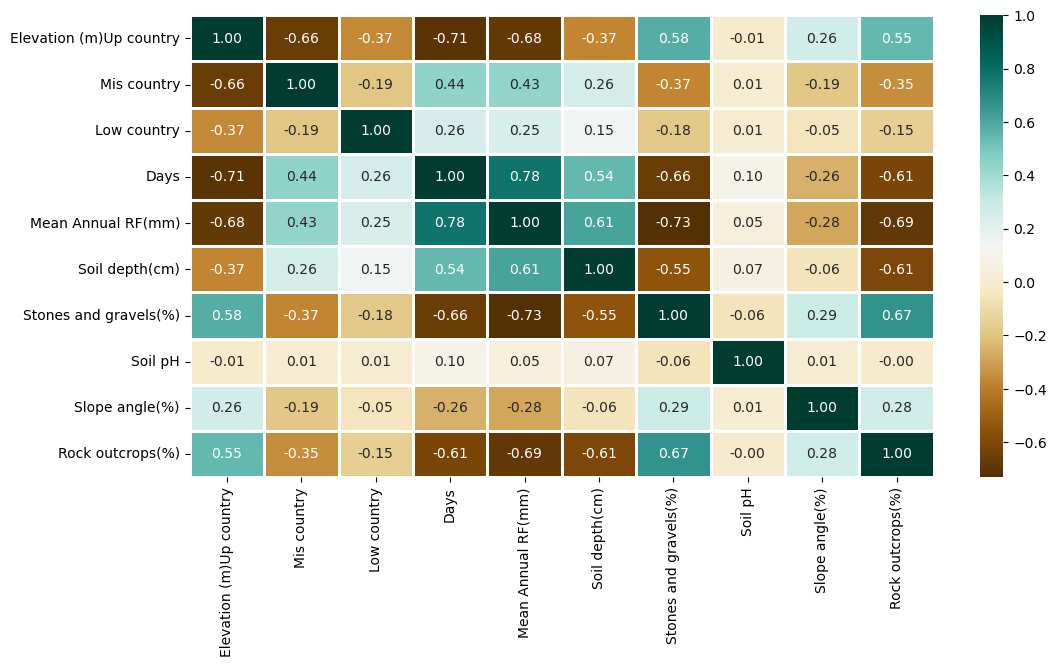

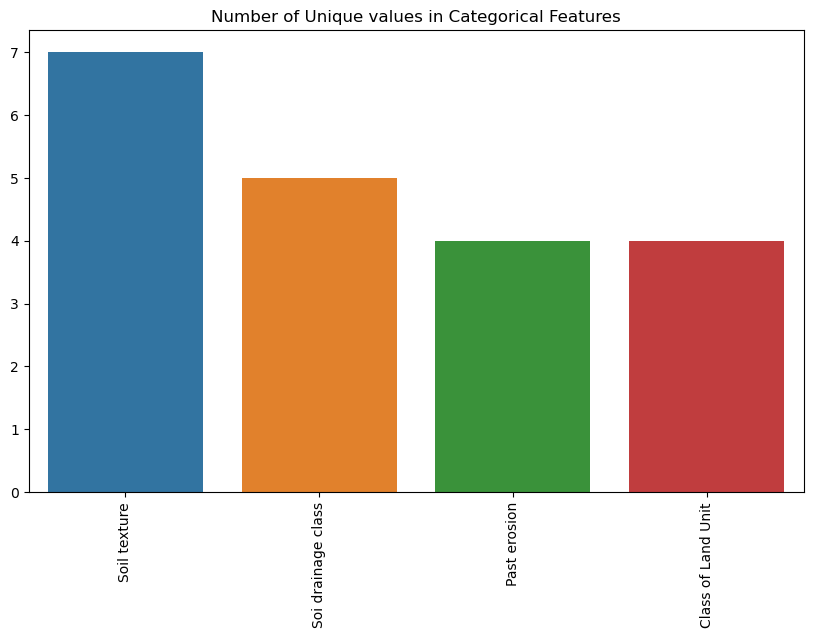

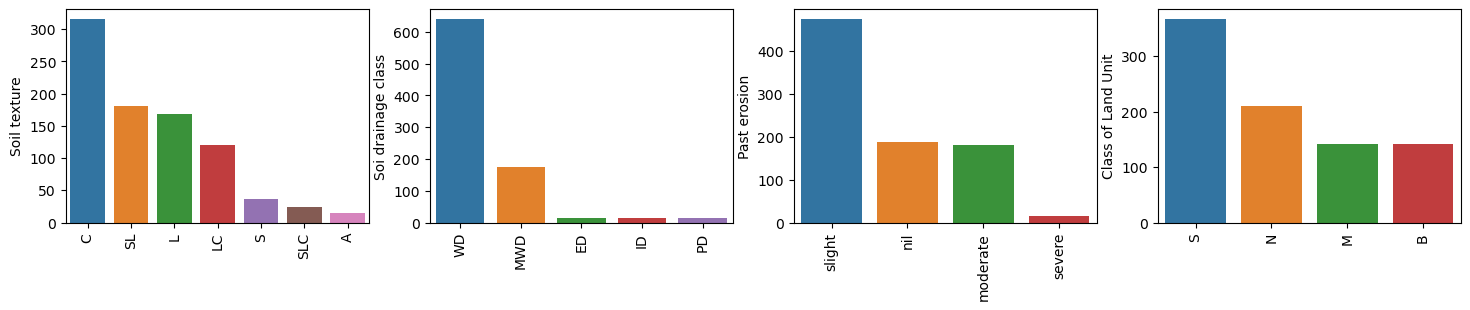

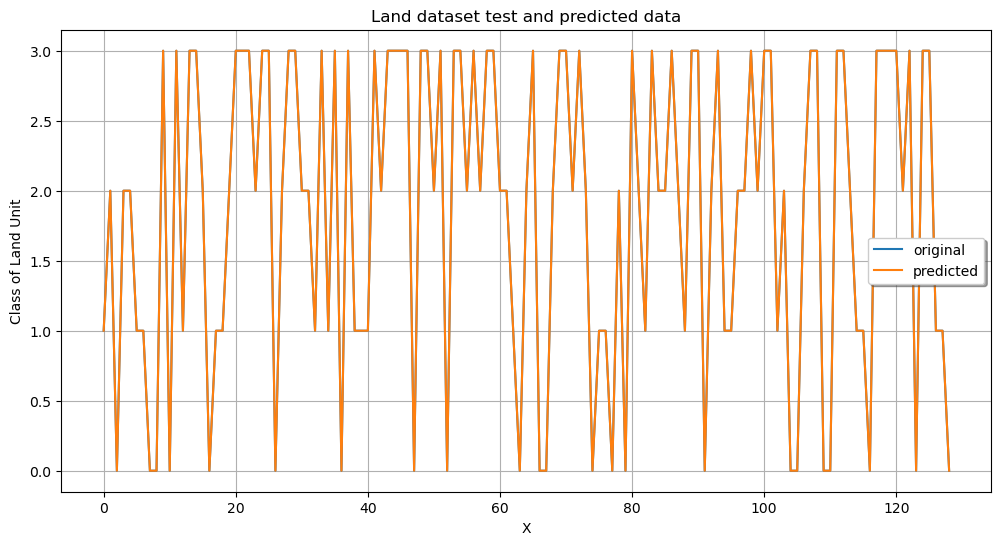

Spport Vector Machine
296292232543611.94
Accuracy: -296292232543511.94 %.
Random Forest
0.0
Accuracy: 100.0 %.
Linear Regression


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

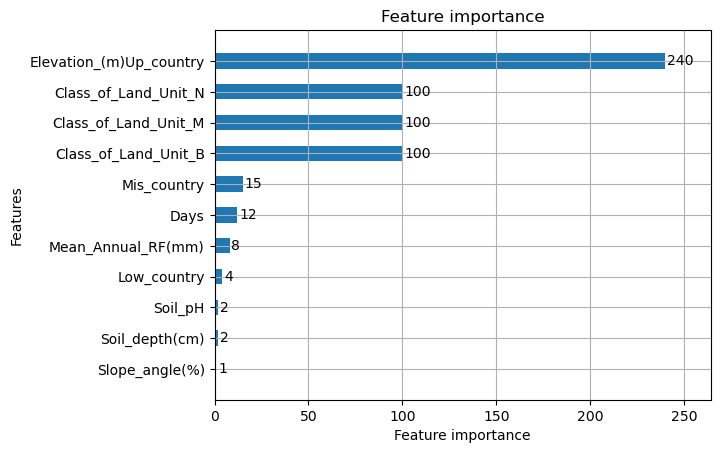

In [1]:
# installing LightGBM
!pip install lightgbm

import lightgbm as lightgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as pyplt
from pandas import DataFrame
import pandas as pnd
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as nump

# read data set from excel
data_set = pnd.read_excel("Land Eveluation DataT.xlsx")

# print shape of the data set with mentinoning number of rows and columns.
print(data_set.shape)

# Get number of categorical attribute in data set and include the attribute column values to a list
obj_category = (data_set.dtypes == 'object')
obj_cols = list(obj_category[obj_category].index)
print("Categorical attributes:",len(obj_cols))

# Get number of integer attributes in data set
integer_ = (data_set.dtypes == 'int')
number_cols = list(integer_[integer_].index)
print("Integer attributes:",len(number_cols))

# Get number float type attributes in data set.
float_ = (data_set.dtypes == 'float')
float_cols = list(float_[float_].index)
print("Float attributes:",len(float_cols))

pyplt.figure(figsize=(12, 6))
sb.heatmap(data_set.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

# Display grapgh of unique values in categorical features
unique_val = []
for col in obj_cols:
  unique_val.append(data_set[col].unique().size)
pyplt.figure(figsize=(10,6))
pyplt.title('Number of Unique values in Categorical Features')
pyplt.xticks(rotation=90)
sb.barplot(x=obj_cols,y=unique_val)

pyplt.figure(figsize=(18, 36))
pyplt.title('Categorical Features: Distribution')
pyplt.xticks(rotation=90)
index = 1

# display seperate graph for each categorical attributes.
for col in obj_cols:
    y = data_set[col].value_counts()
    pyplt.subplot(11, 4, index)
    pyplt.xticks(rotation=90)
    sb.barplot(x=list(y.index), y=y)
    index += 1

# check if there are any null values
data_set.isnull().sum()
 
s = (data_set.dtypes == 'object')
obj_cols = list(s[s].index)
print("Categorical attributes:")
print(obj_cols)
print('No. of. categorical features: ',
      len(obj_cols))


OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pnd.DataFrame(OH_encoder.fit_transform(data_set[obj_cols]))
OH_cols.index = data_set.index
OH_cols.columns = OH_encoder.get_feature_names_out()

target_col = data_set['Class of Land Unit']
final_data = data_set.drop(obj_cols, axis=1)

final_data = pnd.concat([final_data, OH_cols, target_col], axis=1)

# tranform into string
final_data['Class of Land Unit'] = LabelEncoder().fit_transform(final_data['Class of Land Unit'].astype(str))
    
X = final_data.drop(['Class of Land Unit'], axis=1)
Y = final_data['Class of Land Unit']
 
# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.75, test_size=0.15, random_state=0)


# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

# laoding data
lightgb_train = lightgb.Dataset(X_train, Y_train)
lightgb_eval = lightgb.Dataset(X_valid, Y_valid, reference=lightgb_train)

# fitting the model
model = lightgb.train(params,
                 train_set=lightgb_train,
                 valid_sets=lightgb_eval,
                 callbacks=[lightgb.early_stopping(stopping_rounds=30)])

# prediction
Y_pred = model.predict(X_valid)

# accuracy check
mean_sequred_err = mean_squared_error(Y_valid, Y_pred)
rm_sequred_err = mean_sequred_err**(0.5)
print("MSE: %.2f" % mean_sequred_err)
print("RMSE: %.2f" % rm_sequred_err)

# visualizing in a plot
x_axis = range(len(Y_valid))
pyplt.figure(figsize=(12, 6))
pyplt.plot(x_axis, Y_valid, label="original")
pyplt.plot(x_axis, Y_pred, label="predicted")
pyplt.title("Land dataset test and predicted data")
pyplt.xlabel('X')
pyplt.ylabel('Class of Land Unit')
pyplt.legend(loc='best',fancybox=True, shadow=True)
pyplt.grid(True)
pyplt.show()  

# plotting feature importance
lightgb.plot_importance(model, height=.5) 